# 커피 지수
#### (스타벅스 + 커피빈) / (이디야 + 빽다방)

In [94]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import os
from tqdm import tqdm_notebook
from glob import glob 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### 하나의 파일만 가지고 시험

In [95]:
tmp = pd.read_csv('./data/상가정보_202009/상가(상권)정보_강원_202009.csv', sep='|')
tmp = tmp[tmp['상권업종중분류코드'] == 'Q12']
tmp = tmp[['상호명', '도로명주소']]
tmp.head()

상호명                 도로명주소
20        펠로톤       강원도 강릉시 임영로 115
23   키즈까페아이사랑    강원도 강릉시 성덕포남로 45-8
30      상유재카페  강원도 정선군 정선읍 정선로 1323
213     동물과사람      강원도 원주시 천매봉길 117
274     카페비엔또   강원도 영월군 영월읍 중앙1로 59

In [96]:
tmp[tmp['상호명'].str.contains('스타벅스') | tmp['상호명'].str.lower().str.contains('starbucks')]

상호명                    도로명주소
2643             스타벅스        강원도 원주시 금불1길 28-5
11726            스타벅스      강원도 홍천군 서면 한치골길 262
19518            스타벅스   강원도 고성군 토성면 미시령옛길 1153
21516            스타벅스      강원도 춘천시 서부대성로 243-1
29650            스타벅스          강원도 속초시 중앙로 123
34129            스타벅스       강원도 강릉시 경강로 2194-1
35248            스타벅스         강원도 춘천시 경춘로 2341
41966            스타벅스       강원도 고성군 간성읍 간성로 36
42439            스타벅스    강원도 원주시 문막읍 문막시장1길 32
42674            스타벅스        강원도 삼척시 진주로 30-49
45773            스타벅스         강원도 태백시 장성시장1길 6
53001            스타벅스  강원도 인제군 기린면 기린로42번길 3-1
67936            스타벅스           강원도 춘천시 중앙로 55
68831            스타벅스         강원도 원주시 서원대로 178
69181            스타벅스    강원도 평창군 대관령면 올림픽로 715
71162            스타벅스         강원도 원주시 서원대로 402
71844      스타벅스강릉안목항점       강원도 강릉시 창해로14번길 40
74659            스타벅스         강원도 강릉시 경강로 2096
79852            스타벅스      강원도 평창군 봉평면 태기로 174
80385       스타벅스속초DT점        강원도 속초시 동해대로 4114
83051     스타벅스춘천석사DT점           강원도 춘천시 후석로 13
83346   스타벅스강원대점2강원대점      강원도 춘천시 서부대성로 243-1
84895            스타벅스           강원도 춘천시 후석로 13
85195    스타벅스커피원주혁신도시           강원도 원주시 혁신로 55
87091     스타벅스춘천후평DT점          강원도 춘천시 후석로 318
87747     스타벅스설악워터피아점    강원도 속초시 미시령로2983번길 88
88601            스타벅스          강원도 춘천시 후석로 316
89125            스타벅스           강원도 원주시 혁신로 61
91466            스타벅스          강원도 원주시 능라동길 73
93048    스타벅스커피원주혁신도시           강원도 원주시 혁신로 61
93398            스타벅스   강원도 속초시 미시령로2983번길 111
94428            스타벅스          강원도 동해시 중앙로 219
104558           스타벅스          강원도 원주시 남원로 588
111704           스타벅스      강원도 홍천군 서면 한치골길 264
112055           스타벅스          강원도 춘천시 방송길 104
112256           스타벅스       강원도 강릉시 창해로350번길 3
116253           스타벅스  강원도 춘천시 동면 순환대로 1154-63
117123           스타벅스         강원도 강릉시 경강로 2400
117540           스타벅스         강원도 원주시 동부순환로 37

In [97]:
tmp[tmp['상호명'].str.contains('이디야') | tmp['상호명'].str.lower().str.contains('ediya')]

상호명                      도로명주소
3448       이디야커피             강원도 춘천시 충열로 39
10575      이디야커피  강원도 철원군 서면 와수로181번길 25-21
11262      이디야커피     강원도 정선군 고한읍 하이원길 265-1
15796   이디야에스프레소        강원도 춘천시 시청길10번길 4-1
16187      이디야커피        강원도 춘천시 후석로186번길 18
...          ...                        ...
116256     이디야커피            강원도 강릉시 하슬라로 24
116259     이디야커피       강원도 평창군 대관령면 눈마을길 11
117045     이디야커피            강원도 속초시 중앙로 127
117143     이디야커피         강원도 정선군 정선읍 비봉로 55
117582     이디야커피          강원도 춘천시 삭주로 197-1

[79 rows x 2 columns]

In [98]:
len(tmp[tmp['상호명'].str.contains('커피빈') | tmp['상호명'].str.lower().str.contains('coffeebean')])

3

In [99]:
len(tmp[tmp['상호명'].str.contains('빽다방') | tmp['상호명'].str.lower().str.contains('paik')])

15

In [100]:
# 도로명주소로부터 시군구 정보 추출
tmp['시군구'] = [city.split()[1][:-1] for city in tmp['도로명주소']]
tmp.reset_index(drop=True, inplace=True)
tmp.head()

상호명                 도로명주소 시군구
0       펠로톤       강원도 강릉시 임영로 115  강릉
1  키즈까페아이사랑    강원도 강릉시 성덕포남로 45-8  강릉
2     상유재카페  강원도 정선군 정선읍 정선로 1323  정선
3     동물과사람      강원도 원주시 천매봉길 117  원주
4     카페비엔또   강원도 영월군 영월읍 중앙1로 59  영월

### 모든 파일에 대해서 데이터 전처리

In [101]:
file_list = glob('./data/상가정보_202009/상가*.csv')
data = []
for file_name in file_list:
    tmp = pd.read_csv(file_name, sep='|')
    tmp = tmp[tmp['상권업종중분류코드'] == 'Q12']
    tmp = tmp[['상호명', '지점명', '시도명', '시군구명', '도로명주소']]
    data.append(tmp)

df = pd.concat(data, ignore_index=True)

In [102]:
df.head()

상호명  지점명  시도명 시군구명                 도로명주소
0       펠로톤  NaN  강원도  강릉시       강원도 강릉시 임영로 115
1  키즈까페아이사랑  NaN  강원도  강릉시    강원도 강릉시 성덕포남로 45-8
2     상유재카페  NaN  강원도  정선군  강원도 정선군 정선읍 정선로 1323
3     동물과사람  NaN  강원도  원주시      강원도 원주시 천매봉길 117
4     카페비엔또  NaN  강원도  영월군   강원도 영월군 영월읍 중앙1로 59

In [103]:
df[df['시군구명'] == '창원시 마산합포구']

상호명       지점명   시도명       시군구명                           도로명주소
28811        투와이커피       NaN  경상남도  창원시 마산합포구         경상남도 창원시 마산합포구 문화동4길 19
28814        소렌토찻집       NaN  경상남도  창원시 마산합포구  경상남도 창원시 마산합포구 구산면 이순신로 154-82
28818          달카페       NaN  경상남도  창원시 마산합포구        경상남도 창원시 마산합포구 산호북17길 44
28856       더소울커피점       NaN  경상남도  창원시 마산합포구    경상남도 창원시 마산합포구 구산면 해양관광로 925
28873       피렌체커피숍       NaN  경상남도  창원시 마산합포구   경상남도 창원시 마산합포구 구산면 해양관광로 1295
...            ...       ...   ...        ...                             ...
35267        천씨씨커피     마산창동점  경상남도  창원시 마산합포구         경상남도 창원시 마산합포구 창동거리길 32
35286       에이티엠커피       NaN  경상남도  창원시 마산합포구           경상남도 창원시 마산합포구 북성로 71
35304  24시셀프커피&디저트       NaN  경상남도  창원시 마산합포구        경상남도 창원시 마산합포구 산호남로 68-1
35309          더벤티       월영점  경상남도  창원시 마산합포구         경상남도 창원시 마산합포구 월영마을로 12
35314        이디야커피  마산경남데파트점  경상남도  창원시 마산합포구        경상남도 창원시 마산합포구 315대로 255

[322 rows x 5 columns]

In [104]:
df[df['시군구명'] == '창원시 마산회원구']

상호명      지점명   시도명       시군구명                        도로명주소
28812       ds기업      NaN  경상남도  창원시 마산회원구       경상남도 창원시 마산회원구 팔용로 239
28817       안스커피      NaN  경상남도  창원시 마산회원구       경상남도 창원시 마산회원구 북성로 325
28822    갤러리예당카페      NaN  경상남도  창원시 마산회원구       경상남도 창원시 마산회원구 합성남로 59
28825     대성지하다방      NaN  경상남도  창원시 마산회원구    경상남도 창원시 마산회원구 마산역광장로 2-1
28848      7days      NaN  경상남도  창원시 마산회원구        경상남도 창원시 마산회원구 팔용로 30
...          ...      ...   ...        ...                          ...
35340  디저트카페카멜레온      NaN  경상남도  창원시 마산회원구       경상남도 창원시 마산회원구 양덕서로 30
35347      컴포즈커피  마산내서감천점  경상남도  창원시 마산회원구    경상남도 창원시 마산회원구 내서읍 광려로 24
35353       우리커피      NaN  경상남도  창원시 마산회원구       경상남도 창원시 마산회원구 합성옛길 14
35381       코프커피      NaN  경상남도  창원시 마산회원구    경상남도 창원시 마산회원구 석전남9길 53-2
35397      컴포즈커피    마산호계점  경상남도  창원시 마산회원구  경상남도 창원시 마산회원구 내서읍 호계본동로 18

[360 rows x 5 columns]

#### 지역별로 ID 생성

In [105]:
si_name = [None] * len(df)
tmp_gu_keys = ['수원시', '성남시', '안양시', '안산시', '고양시', '용인시', '청주시', '천안시', '전주시', '포항시', '창원시']
tmp_gu_dict = {
    '수원':['장안구', '권선구', '팔달구', '영통구'], 
    '성남':['수정구', '중원구', '분당구'], 
    '안양':['만안구', '동안구'], 
    '안산':['상록구', '단원구'], 
    '고양':['덕양구', '일산동구', '일산서구'], 
    '용인':['처인구', '기흥구', '수지구'], 
    '청주':['상당구', '서원구', '흥덕구', '청원구'], 
    '천안':['동남구', '서북구'], 
    '전주':['완산구', '덕진구'], 
    '포항':['남구', '북구'], 
    '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구']
}

In [106]:
metro_list = ['서울', '부산', '대구', '인천', '대전', '광주', '울산']
for i in df.index:
    if df['시도명'][i][:2] in metro_list:
        if len(df['시군구명'][i]) == 2:
            si_name[i] = df['시도명'][i][:2] + ' ' + df['시군구명'][i]
        else:
            si_name[i] = df['시도명'][i][:2] + ' ' + df['시군구명'][i][:-1]
    else:
        if ' ' in df['시군구명'][i]:
            for key, values in tmp_gu_dict.items():
                if df['시군구명'][i].split()[1] in values:
                    if len(df['시군구명'][i].split()[1]) == 2:
                        si_name[i] = key + ' ' + df['시군구명'][i].split()[1]
                    elif df['시군구명'][i] in ['창원시 마산합포구', '창원시 마산회원구']:
                        si_name[i] = key + ' ' + df['시군구명'][i].split()[1][2:-1]
                    else:
                        si_name[i] = key + ' ' + df['시군구명'][i].split()[1][:-1]
        else:
            if df['시군구명'][i][:-1] == '고성':
                if df['시도명'][i] == '강원도':
                    si_name[i] = '고성(강원)'
                else:
                    si_name[i] = '고성(경남)'
            else:
                si_name[i] = df['시군구명'][i][:-1]


In [107]:
df['ID'] = si_name
df.head()

상호명  지점명  시도명 시군구명                 도로명주소  ID
0       펠로톤  NaN  강원도  강릉시       강원도 강릉시 임영로 115  강릉
1  키즈까페아이사랑  NaN  강원도  강릉시    강원도 강릉시 성덕포남로 45-8  강릉
2     상유재카페  NaN  강원도  정선군  강원도 정선군 정선읍 정선로 1323  정선
3     동물과사람  NaN  강원도  원주시      강원도 원주시 천매봉길 117  원주
4     카페비엔또  NaN  강원도  영월군   강원도 영월군 영월읍 중앙1로 59  영월

In [108]:
df[df['시군구명'].str.contains('창원')]

상호명      지점명   시도명       시군구명                           도로명주소  \
28810       커피빈      NaN  경상남도    창원시 성산구           경상남도 창원시 성산구 원이대로 774   
28811     투와이커피      NaN  경상남도  창원시 마산합포구         경상남도 창원시 마산합포구 문화동4길 19   
28812      ds기업      NaN  경상남도  창원시 마산회원구          경상남도 창원시 마산회원구 팔용로 239   
28814     소렌토찻집      NaN  경상남도  창원시 마산합포구  경상남도 창원시 마산합포구 구산면 이순신로 154-82   
28816       더커피      NaN  경상남도    창원시 의창구        경상남도 창원시 의창구 창원대로397번길 6   
...         ...      ...   ...        ...                             ...   
35376   초심스터디카페    창원상남점  경상남도    창원시 성산구           경상남도 창원시 성산구 원이대로 658   
35377     유나타로7      NaN  경상남도    창원시 진해구           경상남도 창원시 진해구 신항2로 106   
35380  플랜트스터디카페  창원진해라운지  경상남도    창원시 진해구             경상남도 창원시 진해구 냉천로 87   
35381      코프커피      NaN  경상남도  창원시 마산회원구       경상남도 창원시 마산회원구 석전남9길 53-2   
35397     컴포즈커피    마산호계점  경상남도  창원시 마산회원구     경상남도 창원시 마산회원구 내서읍 호계본동로 18   

          ID  
28810  창원 성산  
28811  창원 합포  
28812  창원 회원  
28814  창원 합포  
28816  창원 의창  
...      ...  
35376  창원 성산  
35377  창원 진해  
35380  창원 진해  
35381  창원 회원  
35397  창원 회원  

[2099 rows x 6 columns]

#### 상호명에 따른 필터링

In [109]:
sb_con = df['상호명'].str.contains('스타벅스') | df['상호명'].str.lower().str.contains('starbucks')
cb_con = df['상호명'].str.contains('커피빈') | df['상호명'].str.lower().str.contains('coffeebean')
ed_con = df['상호명'].str.contains('이디야') | df['상호명'].str.lower().str.contains('ediya')
pd_con = df['상호명'].str.contains('빽다방') | df['상호명'].str.lower().str.contains('paik')

In [110]:
starbucks = df[sb_con]
coffeebean = df[cb_con]
ediya = df[ed_con]
paik = df[pd_con]

In [111]:
len(starbucks), len(coffeebean), len(ediya), len(paik)

(1637, 384, 2128, 498)

In [112]:
new_sb = starbucks.groupby('ID')[['상호명']].count()
new_cb = coffeebean.groupby('ID')[['상호명']].count()
new_ed = ediya.groupby('ID')[['상호명']].count()
new_pd = paik.groupby('ID')[['상호명']].count()

In [113]:
new_sb

상호명
ID     
강릉    5
거제    5
경산    8
경주    8
계룡    1
..  ...
하남   10
하동    1
함양    1
홍천    2
화성   19

[190 rows x 1 columns]

In [114]:
new_sb.rename(columns={'상호명': '스타벅스 수'}, inplace=True)
new_cb.rename(columns={'상호명': '커피빈 수'}, inplace=True)
new_ed.rename(columns={'상호명': '이디야 수'}, inplace=True)
new_pd.rename(columns={'상호명': '빽다방 수'}, inplace=True)

In [115]:
new_pd

빽다방 수
ID           
강릉          2
거창          1
경산          3
경주          2
고성(경남)      2
...       ...
포항 북구       2
하남          1
홍성          2
홍천          1
화성         11

[147 rows x 1 columns]

In [116]:
new_ed

이디야 수
ID       
가평      7
강릉     14
강진      1
거제      7
거창      1
..    ...
홍성      3
홍천      3
화성     25
화천      1
횡성      1

[235 rows x 1 columns]

In [117]:
cafe = new_sb.join([new_cb, new_ed, new_pd], how='outer')
cafe.fillna(0.0, inplace=True)
cafe

스타벅스 수  커피빈 수  이디야 수  빽다방 수
강릉     5.0    0.0   14.0    2.0
거제     5.0    0.0    7.0    0.0
경산     8.0    0.0    9.0    3.0
경주     8.0    2.0   24.0    2.0
계룡     1.0    0.0    0.0    0.0
..     ...    ...    ...    ...
합천     0.0    0.0    1.0    0.0
홍성     0.0    0.0    3.0    2.0
화천     0.0    0.0    1.0    0.0
횡성     0.0    0.0    1.0    0.0
예천     0.0    0.0    0.0    1.0

[241 rows x 4 columns]

In [118]:
cafe['커피지수'] = (cafe['스타벅스 수'] + cafe['커피빈 수']) / (cafe['이디야 수'] + cafe['빽다방 수'])
cafe

스타벅스 수  커피빈 수  이디야 수  빽다방 수      커피지수
강릉     5.0    0.0   14.0    2.0  0.312500
거제     5.0    0.0    7.0    0.0  0.714286
경산     8.0    0.0    9.0    3.0  0.666667
경주     8.0    2.0   24.0    2.0  0.384615
계룡     1.0    0.0    0.0    0.0       inf
..     ...    ...    ...    ...       ...
합천     0.0    0.0    1.0    0.0  0.000000
홍성     0.0    0.0    3.0    2.0  0.000000
화천     0.0    0.0    1.0    0.0  0.000000
횡성     0.0    0.0    1.0    0.0  0.000000
예천     0.0    0.0    0.0    1.0  0.000000

[241 rows x 5 columns]

- '이디야 수 + 빽다방 수' 가 0이 나와서 inf가 출력되는 것 같습니다.

In [119]:
cafe[cafe['커피지수'] == np.inf]

스타벅스 수  커피빈 수  이디야 수  빽다방 수  커피지수
계룡     1.0    0.0    0.0    0.0   inf
영양     1.0    0.0    0.0    0.0   inf
청양     1.0    0.0    0.0    0.0   inf
하동     1.0    0.0    0.0    0.0   inf
금산     0.0    1.0    0.0    0.0   inf

In [120]:
# inf를 0으로 설정
for i in cafe[cafe['커피지수'] == np.inf].index:
    cafe['커피지수'][i] = 0

In [121]:
cafe.loc[['계룡', '영양', '청양', '하동', '금산']]

스타벅스 수  커피빈 수  이디야 수  빽다방 수  커피지수
계룡     1.0    0.0    0.0    0.0   0.0
영양     1.0    0.0    0.0    0.0   0.0
청양     1.0    0.0    0.0    0.0   0.0
하동     1.0    0.0    0.0    0.0   0.0
금산     0.0    1.0    0.0    0.0   0.0

### Cartogram 지도

In [122]:
map_raw = pd.read_excel('./data/draw_korea_raw.xlsx', encoding='euc-kr')
map_raw

0      1       2       3       4       5      6       7      8      9   \
0     NaN    NaN     NaN     NaN     NaN     NaN    NaN      철원     화천     양구   
1     NaN    NaN     NaN      양주     동두천      연천     포천     의정부     인제     춘천   
2     NaN    NaN     NaN      파주  고양 일산동   서울 도봉  서울 노원     남양주     홍천     횡성   
3     NaN    NaN     NaN  고양 일산서   고양 덕양   서울 강북  서울 성북      가평     구리     하남   
4     NaN    NaN      김포   안양 만안      광명  서울 서대문  서울 종로  서울 동대문  서울 중랑     양평   
5     NaN  인천 강화      부천   안양 동안   서울 은평   서울 마포  서울 중구   서울 성동  서울 강동     여주   
6     NaN  인천 서구   인천 동구      시흥   서울 강서   서울 동작  서울 용산   서울 광진  서울 송파     이천   
7     NaN    NaN   인천 계양   안산 상록   서울 양천   서울 관악  서울 서초      과천  성남 중원     광주   
8     NaN    NaN   인천 부평   안산 단원  서울 영등포   서울 금천  서울 강남   성남 분당  성남 수정  용인 수지   
9     NaN  인천 중구  인천 미추홀      화성   서울 구로      군포     의왕   수원 영통  용인 기흥  용인 처인   
10  인천 옹진  인천 연수   인천 남동      오산      안성   수원 권선  수원 장안      제천     예천     영주   
11     태안     아산   천안 동남   천안 서북      평택      음성  수원 팔달      단양     상주     김천   
12    NaN     당진      홍성      예산      공주      진천     충주   청주 흥덕     괴산     칠곡   
13    NaN     서산      보령      청양      세종   대전 대덕     증평   청주 청원     보은     고령   
14    NaN    NaN      부여      논산      계룡   대전 동구  청주 상당   청주 서원  대구 북구  대구 중구   
15    NaN    NaN      서천      금산   대전 유성   대전 중구     옥천      영동  대구 서구  대구 남구   
16    NaN    NaN      군산      익산   대전 서구      무주     거창      합천  대구 달서  대구 달성   
17    NaN    NaN      부안      김제      완주      장수     함양      창녕     밀양  부산 북구   
18    NaN     고창      정읍   전주 덕진      진안      남원     진주      의령  부산 강서  부산 사상   
19    NaN     영광      장성   전주 완산      임실      산청     함안      양산  창원 합포  부산 서구   
20    NaN     함평      담양      순창      구례      하동  창원 의창   창원 성산  창원 진해     김해   
21     신안     무안   광주 광산      곡성      화순      광양     사천   창원 회원     통영    NaN   
22     목포     나주   광주 서구   광주 북구      순천      고흥     남해  고성(경남)     거제    NaN   
23     해남     영암   광주 남구   광주 동구      여수     NaN    NaN     NaN    NaN    NaN   
24     진도     강진      장흥      보성     NaN     NaN    NaN     NaN    NaN    NaN   
25    NaN    NaN      완도     NaN     NaN      제주    NaN     NaN    NaN    NaN   
26    NaN    NaN     NaN     NaN     NaN     서귀포    NaN     NaN    NaN    NaN   

        10     11      12   13  
0   고성(강원)    NaN     NaN  NaN  
1       속초    NaN     NaN  NaN  
2       양양    NaN     NaN  NaN  
3       정선     강릉     NaN  NaN  
4       태백     동해     NaN  NaN  
5       원주     삼척     NaN  NaN  
6       평창     울진     NaN  NaN  
7       영월     영덕     NaN  NaN  
8       문경     봉화     NaN   울릉  
9       안동     영양     NaN  NaN  
10      구미     청송   포항 북구  NaN  
11      군위     의성   포항 남구  NaN  
12      영천     경산      경주  NaN  
13      청도     성주   울산 북구  NaN  
14   대구 수성  울산 울주   울산 동구  NaN  
15   대구 동구  울산 중구   울산 남구  NaN  
16   부산 금정  부산 동래   부산 기장  NaN  
17  부산 부산진  부산 연제  부산 해운대  NaN  
18   부산 동구  부산 중구     NaN  NaN  
19   부산 사하  부산 남구     NaN  NaN  
20   부산 영도  부산 수영     NaN  NaN  
21     NaN    NaN     NaN  NaN  
22     NaN    NaN     NaN  NaN  
23     NaN    NaN     NaN  NaN  
24     NaN    NaN     NaN  NaN  
25     NaN    NaN     NaN  NaN  
26     NaN    NaN     NaN  NaN

In [151]:
map_raw.isnull().sum()

0     21
1     13
2      5
3      3
4      4
5      3
6      5
7      4
8      4
9      6
10     6
11     9
12    19
13    26
dtype: int64

In [123]:
draw_korea = pd.DataFrame(map_raw.stack())
draw_korea.reset_index(inplace=True)
draw_korea.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, inplace=True)
draw_korea.head()

y   x      ID
0  0   7      철원
1  0   8      화천
2  0   9      양구
3  0  10  고성(강원)
4  1   3      양주

In [124]:
BORDER_LINES = [
    [(5, 1), (5,2), (6,2), (6,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), (11,4), (11,3)], # 경기
    [(8,10), (8,11), (6,11), (6,12)], # 강원
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), (15,4), (16,4), (16,2)], # 충북
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전북
    [(13,5), (13,6), (16,6)], # 대전
    [(13,5), (14,5)], #세종
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전남
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충남
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경북
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
    [(27,5), (27,6), (25,6)],
]

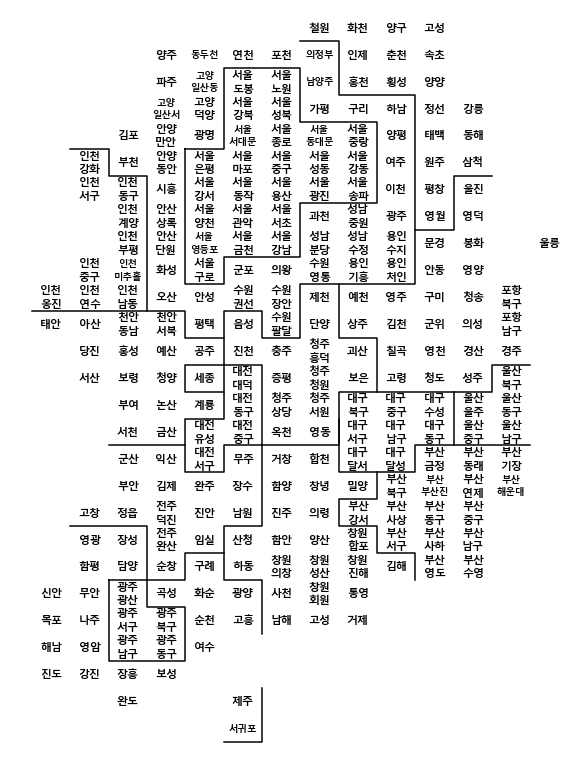

In [125]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
    if len(row.ID.split())==2:
        dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
    elif row.ID[:2]=='고성':
        dispname = '고성'
    else:
        dispname = row.ID

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [126]:
cafe.reset_index(inplace=True)
cafe.rename(columns={'index': 'ID'}, inplace=True)
cafe.head()

ID  스타벅스 수  커피빈 수  이디야 수  빽다방 수      커피지수
0  강릉     5.0    0.0   14.0    2.0  0.312500
1  거제     5.0    0.0    7.0    0.0  0.714286
2  경산     8.0    0.0    9.0    3.0  0.666667
3  경주     8.0    2.0   24.0    2.0  0.384615
4  계룡     1.0    0.0    0.0    0.0  0.000000

In [127]:
cafe_result = pd.merge(cafe, draw_korea, how='left', on='ID')
cafe_result.head()

ID  스타벅스 수  커피빈 수  이디야 수  빽다방 수      커피지수     y     x
0  강릉     5.0    0.0   14.0    2.0  0.312500   3.0  11.0
1  거제     5.0    0.0    7.0    0.0  0.714286  22.0   8.0
2  경산     8.0    0.0    9.0    3.0  0.666667  12.0  11.0
3  경주     8.0    2.0   24.0    2.0  0.384615  12.0  12.0
4  계룡     1.0    0.0    0.0    0.0  0.000000  14.0   4.0

In [154]:
cafe_result.isnull().sum()

ID        0
스타벅스 수    0
커피빈 수     0
이디야 수     0
빽다방 수     0
커피지수      0
y         5
x         5
dtype: int64

In [132]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData]))*0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    
    for idx, row in draw_korea.iterrows():
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0],row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2
        plt.annotate(dispname, (row['x']+0.5,row['y']+0.5), weight='bold',
            fontsize=fontsize, ha='center', va='center',
            linespacing=linespacing)
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs,ys,c='black', lw=1.5)
    plt.gca().invert_yaxis()

    plt.axis('off')
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

#### 커피지수

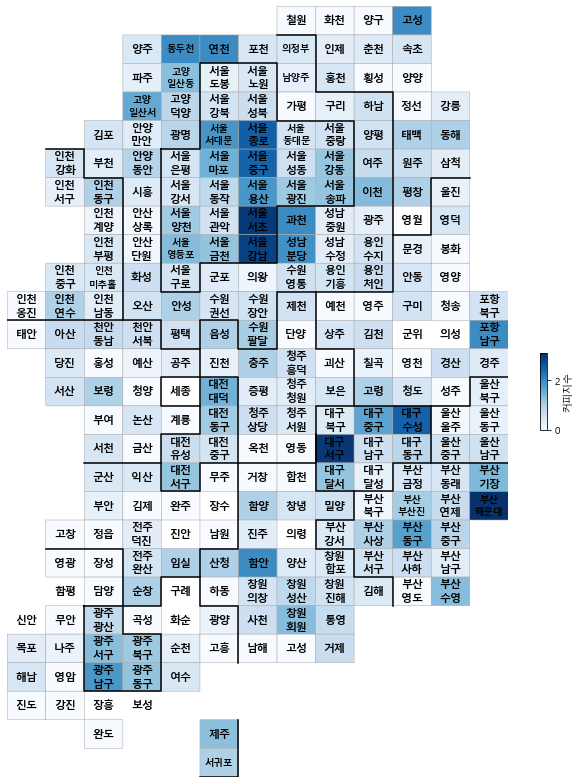

In [133]:
drawKorea('커피지수', cafe_result, 'Blues')

In [155]:
# 커피지수 Top 5
cafe_result.sort_values(by='커피지수', ascending=False).head()

ID  스타벅스 수  커피빈 수  이디야 수  빽다방 수      커피지수     y     x
65  부산 해운대    29.0    5.0    9.0    2.0  3.090909  17.0  12.0
36   대구 서구     3.0    0.0    1.0    0.0  3.000000  15.0   8.0
87   서울 서초    49.0   31.0   20.0    7.0  2.962963   7.0   6.0
73   서울 강남    87.0   69.0   42.0   12.0  2.888889   8.0   6.0
95   서울 종로    33.0   15.0   14.0    5.0  2.526316   4.0   6.0

#### 스타벅스 매장 수

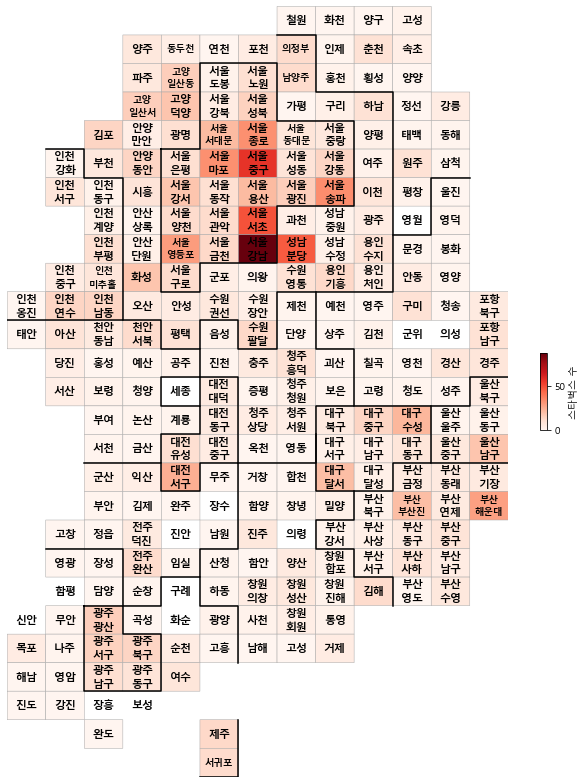

In [161]:
drawKorea('스타벅스 수', cafe_result, 'Reds')

In [158]:
# 스타벅스 매장 수 Top 5
cafe_result.sort_values(by='스타벅스 수', ascending=False).head()

ID  스타벅스 수  커피빈 수  이디야 수  빽다방 수      커피지수    y    x
73  서울 강남    87.0   69.0   42.0   12.0  2.888889  8.0  6.0
96  서울 중구    57.0   15.0   22.0    7.0  2.482759  5.0  6.0
87  서울 서초    49.0   31.0   20.0    7.0  2.962963  7.0  6.0
99  성남 분당    47.0   17.0   21.0   12.0  1.939394  8.0  7.0
90  서울 송파    34.0   13.0   28.0   10.0  1.236842  6.0  8.0

#### 커피빈 매장 수

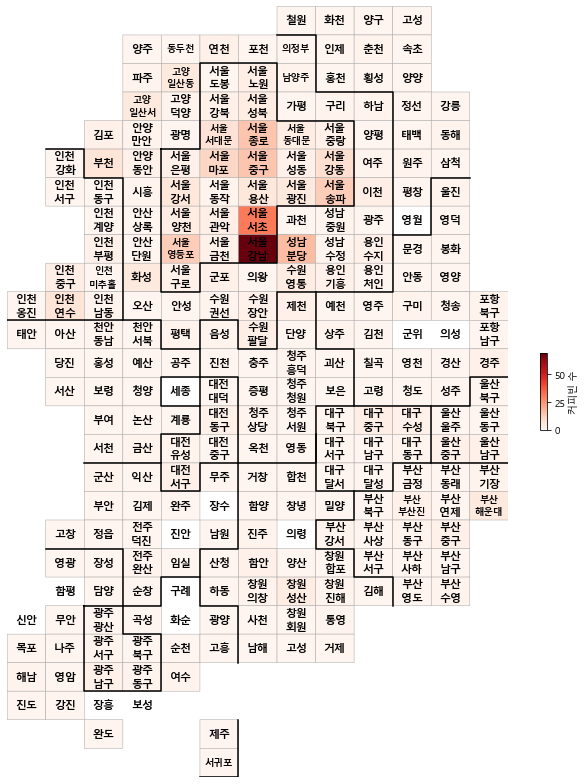

In [159]:
drawKorea('커피빈 수', cafe_result, 'Reds')

In [160]:
# 커피빈 매장 수 Top 5
cafe_result.sort_values(by='커피빈 수', ascending=False).head()

ID  스타벅스 수  커피빈 수  이디야 수  빽다방 수      커피지수    y    x
73  서울 강남    87.0   69.0   42.0   12.0  2.888889  8.0  6.0
87  서울 서초    49.0   31.0   20.0    7.0  2.962963  7.0  6.0
99  성남 분당    47.0   17.0   21.0   12.0  1.939394  8.0  7.0
95  서울 종로    33.0   15.0   14.0    5.0  2.526316  4.0  6.0
96  서울 중구    57.0   15.0   22.0    7.0  2.482759  5.0  6.0

#### 이디야 매장 수

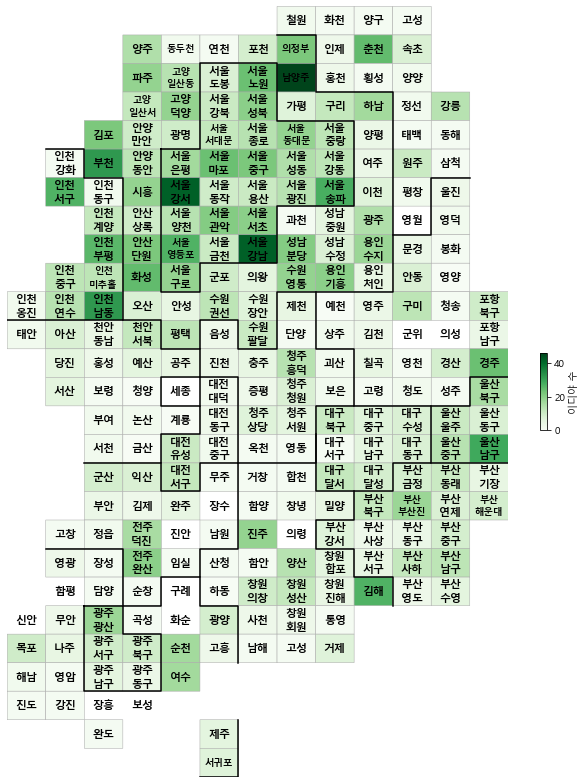

In [162]:
drawKorea('이디야 수', cafe_result, 'Greens')

In [163]:
# 이디야 매장 수 Top 5
cafe_result.sort_values(by='이디야 수', ascending=False).head()

ID  스타벅스 수  커피빈 수  이디야 수  빽다방 수      커피지수     y    x
28     남양주    12.0    1.0   46.0    3.0  0.265306   2.0  7.0
73   서울 강남    87.0   69.0   42.0   12.0  2.888889   8.0  6.0
76   서울 강서    19.0    6.0   42.0    8.0  0.500000   6.0  4.0
67      부천     7.0    7.0   32.0    9.0  0.341463   5.0  2.0
145  인천 남동    14.0    1.0   32.0   13.0  0.333333  10.0  2.0

#### 빽다방 매장 수

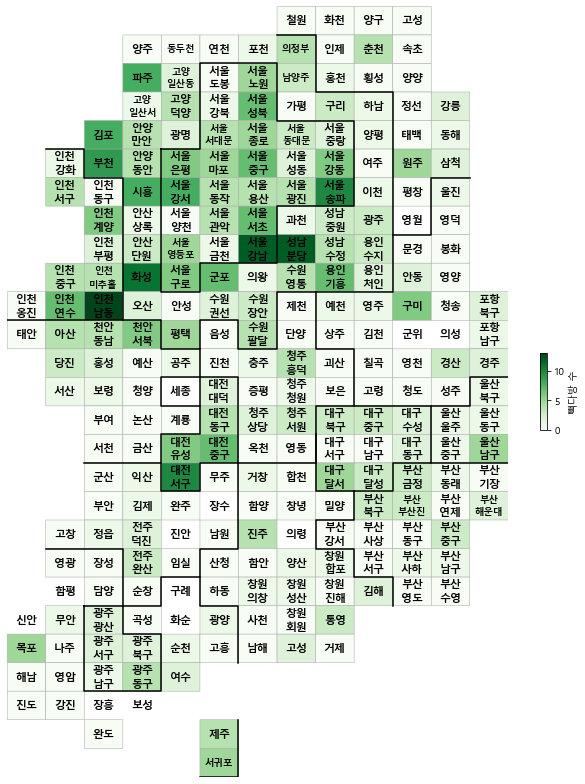

In [164]:
drawKorea('빽다방 수', cafe_result, 'Greens')

In [166]:
# 빽다방 매장 수 Top 5
cafe_result.sort_values(by='빽다방 수', ascending=False).head()

ID  스타벅스 수  커피빈 수  이디야 수  빽다방 수      커피지수     y    x
145  인천 남동    14.0    1.0   32.0   13.0  0.333333  10.0  2.0
99   성남 분당    47.0   17.0   21.0   12.0  1.939394   8.0  7.0
73   서울 강남    87.0   69.0   42.0   12.0  2.888889   8.0  6.0
189     화성    19.0    5.0   25.0   11.0  0.666667   9.0  3.0
41   대전 서구    25.0    2.0   12.0   10.0  1.227273  16.0  4.0

### Folium 지도

In [170]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category='FutureWarning')

In [171]:
cafe_folium = cafe_result.set_index('ID')
cafe_folium.head()

스타벅스 수  커피빈 수  이디야 수  빽다방 수      커피지수     y     x
ID                                                   
강릉     5.0    0.0   14.0    2.0  0.312500   3.0  11.0
거제     5.0    0.0    7.0    0.0  0.714286  22.0   8.0
경산     8.0    0.0    9.0    3.0  0.666667  12.0  11.0
경주     8.0    2.0   24.0    2.0  0.384615  12.0  12.0
계룡     1.0    0.0    0.0    0.0  0.000000  14.0   4.0

In [176]:
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
folium.Choropleth(geo_data = geo_data,
               data = cafe_folium['커피지수'],
               columns = [cafe_folium.index, cafe_folium['커피지수']],
               fill_color = 'YlGnBu',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:16px"><b>전국 커피지수</b></h3>'  
map.get_root().html.add_child(folium.Element(title_html))

map

In [177]:
cafe_result[cafe_result['ID'] == '영월']

Empty DataFrame
Columns: [ID, 스타벅스 수, 커피빈 수, 이디야 수, 빽다방 수, 커피지수, y, x]
Index: []

- 위의 영월과 같이 아예 4개의 브랜드 매장에 대해 데이터가 없는 지역이 있어서 지도가 제대로 표시되지 않는 것 같습니다.

#### 모든 지역을 받아오기 위해 이전에 작업했던 인구소멸위기지역 결과 파일을 읽어와 작업

In [190]:
pop = pd.read_csv('./output/01_population.csv', encoding='utf8', index_col=0)
pop.head()

광역시도  시군구  20~39세계  20~39세여자  65세이상계    인구수계   인구수남자   인구수여자      소멸비율  \
0   강원  강릉시    46008     20993   40497  203057  101154  101903  1.036768   
1   강원  고성군     4006      1699    7005   23621   11933   11688  0.485082   
2   강원  동해시    16311      7510   16152   83888   42093   41795  0.929916   
3   강원  삼척시    12428      5280   14953   61833   31630   30203  0.706213   
4   강원  속초시    15928      7411   14010   76302   37488   38814  1.057959   

   소멸위기지역      ID  y   x       여성비   2030여성비  
0       0      강릉  3  11  0.184431 -4.370979  
1       1  고성(강원)  0  10 -0.518606 -7.588617  
2       1      동해  4  11 -0.177618 -3.957452  
3       1      삼척  5  11 -1.153915 -7.515288  
4       0      속초  1  10  0.868916 -3.471873

In [192]:
len(pop['ID'].unique())

250

In [193]:
pop = pop[['ID', 'y', 'x']]
pop

ID   y   x
0        강릉   3  11
1    고성(강원)   0  10
2        동해   4  11
3        삼척   5  11
4        속초   1  10
..      ...  ..  ..
245      증평  13   6
246      진천  12   5
247   청주 청원  13   7
248      충주  12   6
249   청주 흥덕  12   7

[250 rows x 3 columns]

In [195]:
cafe_result2 = pd.merge(pop, cafe, how='left', on='ID')
cafe_result2.fillna(0, inplace=True)
cafe_result2

ID   y   x  스타벅스 수  커피빈 수  이디야 수  빽다방 수      커피지수
0        강릉   3  11     5.0    0.0   14.0    2.0  0.312500
1    고성(강원)   0  10     2.0    0.0    1.0    0.0  2.000000
2        동해   4  11     1.0    1.0    1.0    1.0  1.000000
3        삼척   5  11     1.0    0.0    1.0    2.0  0.333333
4        속초   1  10     4.0    0.0    8.0    0.0  0.500000
..      ...  ..  ..     ...    ...    ...    ...       ...
245      증평  13   6     1.0    0.0    3.0    0.0  0.333333
246      진천  12   5     1.0    0.0    4.0    0.0  0.250000
247   청주 청원  13   7     3.0    0.0    8.0    1.0  0.333333
248      충주  12   6     6.0    0.0    5.0    1.0  1.000000
249   청주 흥덕  12   7    10.0    1.0   14.0    4.0  0.611111

[250 rows x 8 columns]

In [196]:
cafe_result2.to_csv('./output/커피지수.csv', index=False)

In [197]:
cafe_folium2 = cafe_result2.set_index('ID')
cafe_folium2.head()

y   x  스타벅스 수  커피빈 수  이디야 수  빽다방 수      커피지수
ID                                                  
강릉      3  11     5.0    0.0   14.0    2.0  0.312500
고성(강원)  0  10     2.0    0.0    1.0    0.0  2.000000
동해      4  11     1.0    1.0    1.0    1.0  1.000000
삼척      5  11     1.0    0.0    1.0    2.0  0.333333
속초      1  10     4.0    0.0    8.0    0.0  0.500000

In [198]:
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
folium.Choropleth(geo_data = geo_data,
               data = cafe_folium2['커피지수'],
               columns = [cafe_folium2.index, cafe_folium2['커피지수']],
               fill_color = 'YlGnBu',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:16px"><b>전국 커피지수</b></h3>'  
map.get_root().html.add_child(folium.Element(title_html))

map